# L04 19/03/24

# Exercise 1 - Epathitis Dataset

Tasks:
1. Explore the dataset
2. Replace missing content
3. Pre-process variables
4. Find outlayers
5. Split
6. Train a random forest
7. Evaluate performance

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/hepatitis.csv', sep=',', index_col=0)
df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
age,,,,,,,,,,,,,,,,,,,
30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live


In [3]:
df.dtypes

sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [4]:
df = df.convert_dtypes() # force pandas to infer the data types
df.dtypes

sex                string[python]
steroid                   boolean
antivirals                boolean
fatigue                   boolean
malaise                   boolean
anorexia                  boolean
liver_big                 boolean
liver_firm                boolean
spleen_palpable           boolean
spiders                   boolean
ascites                   boolean
varices                   boolean
bilirubin                 Float64
alk_phosphate               Int64
sgot                        Int64
albumin                   Float64
protime                     Int64
histology                 boolean
class              string[python]
dtype: object

In [5]:
df.isna().sum() # number of na

sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [6]:
df.isna().sum() / len(df) * 100 # percentage of na

sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

## Cleaning dataset

### Case 1, drop NA

In [7]:
df.dropna(axis=0) # drop rows with na, 1 would have dropped columns
df.isna().sum() / len(df) * 100 # percentage of na

sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

In [8]:
df = df.dropna(thresh=.8*len(df), axis = 1) # drop columns with more than 80% of na
df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
age,,,,,,,,,,,,,,,,,,
30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,False,live
50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,False,live
78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,False,live
31,female,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,False,live
34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,<NA>,242,3.3,True,die
44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,True,live
61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,True,live


### Case 3 (preferred) - we want tot insert generated values

In [9]:
boolean_cols = df.select_dtypes(include = bool).columns


In [10]:
most_frequent_values = df[boolean_cols].mode().iloc[0]
most_frequent_values

steroid             True
antivirals         False
fatigue             True
malaise            False
anorexia           False
liver_big           True
liver_firm         False
spleen_palpable    False
spiders            False
ascites            False
varices            False
histology          False
Name: 0, dtype: boolean

In [11]:
df[boolean_cols] = df[boolean_cols].fillna(most_frequent_values)

In [12]:
df.isna().sum() / len(df) * 100 # percentage of na

sex                 0.000000
steroid             0.000000
antivirals          0.000000
fatigue             0.000000
malaise             0.000000
anorexia            0.000000
liver_big           0.000000
liver_firm          0.000000
spleen_palpable     0.000000
spiders             0.000000
ascites             0.000000
varices             0.000000
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
histology           0.000000
class               0.000000
dtype: float64

#### Do the same for integer values

In [13]:
integer_cols = df.select_dtypes(include = int).columns
integer_cols

Index(['alk_phosphate', 'sgot'], dtype='object')

In [14]:
median_values = df[integer_cols].median()
median_values

alk_phosphate    85.0
sgot             58.0
dtype: Float64

In [15]:
df[integer_cols] = df[integer_cols].fillna(median_values)


#### Same for floats

In [16]:
float_cols = df.select_dtypes(include = float).columns
mean_values = df[float_cols].mean()
df[float_cols] = df[float_cols].fillna(mean_values)

#### Same for categorical

In [17]:
categorical_cols = df.select_dtypes(include='string').columns
categorical_mode_cols = df[categorical_cols].mode()
df[categorical_cols] = df[categorical_cols].fillna(categorical_mode_cols)

#### Test to see if there are any null value

In [18]:
df.isnull().values.any()

False

---

## Encode the Features

In [19]:
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [20]:
le = sklearn.preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])
# df['sex'] = le.fit_transform(df['sex'])
df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
age,,,,,,,,,,,,,,,,,,
30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,False,1
50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,False,1
78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,False,1
31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,False,1
34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,85,200,4.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,85,242,3.3,True,0
44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,True,1
61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,True,1


#### By hand:

In [21]:
'''
df['class'] = df['class'].astype(str).map({'die': '0', 'live': '1'}).astype(int)
df['sex'] = df['sex'].astype(str).map({'male':'0', 'female' : '1'}).astype(int)
df
'''

"\ndf['class'] = df['class'].astype(str).map({'die': '0', 'live': '1'}).astype(int)\ndf['sex'] = df['sex'].astype(str).map({'male':'0', 'female' : '1'}).astype(int)\ndf\n"

#### Different way using get_dummies

In [22]:
categorical_features = df.select_dtypes(include='string').columns.tolist()
df = pd.get_dummies(df, prefix = categorical_features)
df

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class,sex_female,sex_male
age,,,,,,,,,,,,,,,,,,,
30,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,False,1,False,True
50,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,False,1,True,False
78,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,False,1,True,False
31,True,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,False,1,True,False
34,True,False,False,False,False,True,False,False,False,False,False,1.0,85,200,4.0,False,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,True,False,True,True,True,True,False,False,True,True,True,7.6,85,242,3.3,True,0,True,False
44,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,True,1,True,False
61,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,True,1,True,False


## Find Outliers

### Isolation Forset

In [23]:
isoforest = sklearn.ensemble.IsolationForest(n_estimators=1000, contamination=0.01, random_state=0)

res = isoforest.fit_predict(df.to_numpy())
res

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1])

In [24]:
df[res == -1]

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class,sex_female,sex_male
age,,,,,,,,,,,,,,,,,,,
20,False,False,True,True,True,False,True,True,True,False,False,2.3,150,68,3.9,False,1,False,True
25,True,False,True,False,False,False,True,True,True,True,True,1.3,181,181,4.5,True,1,True,False


### PCA

In [25]:
pca = sklearn.decomposition.PCA(n_components=0.9999) # want an high number, close to 1, otherwise I lose too many data

X_pca = pca.fit_transform(df)

X_ori = pca.inverse_transform(X_pca)

anomaly_score = np.abs(df.to_numpy() - X_ori).sum(1)

threshold = np.quantile(anomaly_score, 0.99)

anomalous_ids = np.argwhere(anomaly_score > threshold).squeeze()

df.iloc[anomalous_ids]

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class,sex_female,sex_male
age,,,,,,,,,,,,,,,,,,,
51,False,False,True,False,True,True,False,True,True,False,False,1.427517,85,58,3.817266,False,0,True,False
53,False,False,True,False,False,True,False,True,True,False,True,1.5,81,19,4.1,True,1,False,True


In [26]:

# Split the dataset in 
x = df[list(set(df.columns) - set(['class']))]
y = df['class']

## Normalization

In [27]:

scaler  = sklearn.preprocessing.StandardScaler()
x = scaler.fit_transform(x)

## Split in train and test

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [29]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)


(155, 18)
(124, 18)
(31, 18)


## Train

In [30]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 100)

In [31]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_estim = rf.predict(x_test)

## Evaluation

In [33]:
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_estim)
conf_mat

array([[ 3,  6],
       [ 1, 21]])

In [34]:
acc = sklearn.metrics.accuracy_score(y_test, y_estim)
acc

0.7741935483870968

# Exercise 2 - Titanic

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tn = pd.read_csv('./datasets/titanic.csv', sep=',', index_col=0)
tn = tn.drop(columns=['Name', 'Ticket', 'Cabin'])
tn = tn.convert_dtypes()

tn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.25,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.925,S
4,1,1,female,35.0,1,0,53.1,S
5,0,3,male,35.0,0,0,8.05,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0,S
888,1,1,female,19.0,0,0,30.0,S
889,0,3,female,<NA>,1,2,23.45,S


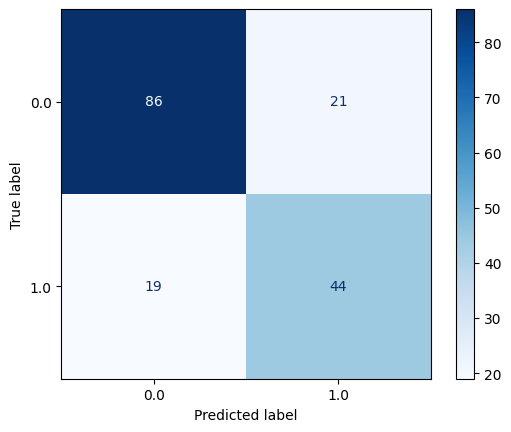

0.7647058823529411

In [54]:


#boolean_cols = tn.select_dtypes(include = bool).columns
#most_frequent_values = tn[boolean_cols].mode().iloc[0]
#tn[boolean_cols] = tn[boolean_cols].fillna(most_frequent_values)

integer_cols = tn.select_dtypes(include = int).columns
median_values = tn[integer_cols].median()
tn[integer_cols] = tn[integer_cols].fillna(median_values)

float_cols = tn.select_dtypes(include = float).columns
mean_values = tn[float_cols].mean()
tn[float_cols] = tn[float_cols].fillna(mean_values)

categorical_cols = tn.select_dtypes(include='string').columns
categorical_mode_cols = tn[categorical_cols].mode()
tn[categorical_cols] = tn[categorical_cols].fillna(categorical_mode_cols)


categorical_features = tn.select_dtypes(include='string').columns.tolist()
tn = pd.get_dummies(tn, prefix = categorical_features)

isoforest = sklearn.ensemble.IsolationForest(n_estimators=1000, contamination=0.01, random_state=0)
res = isoforest.fit_predict(tn.to_numpy())
tn.drop(axis=1, inplace=True, index=tn[res == -1].index)


# Split the dataset
x = tn[list(set(tn.columns) - set(['Survived']))]
y = tn['Survived']
scaler  = sklearn.preprocessing.StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)
y_estim = rf.predict(x_test)
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_estim)
acc = sklearn.metrics.accuracy_score(y_test, y_estim)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                               display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

acc